In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.viz import plot_histograms
from src.viz import plot_categorical_countplots
from src.viz import plot_corr

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize']=(20,10)
%matplotlib inline

In [2]:
# reading the dataset
df = pd.read_csv(r'..\data\Mumbai House Prices.csv')
df.shape

(76038, 9)

# Columns Description

## bhk
- **Description**: Number of bedrooms, hall, and kitchen collectively.
- **Data Type**: Integer
- **Example Values**: 1, 2, 3, 4

## type
- **Description**: Type of house.
- **Data Type**: String
- **Possible Values**:
  - apartment
  - villa
  - independent house
  - studio apartment

## locality
- **Description**: Locality of the house.
- **Data Type**: String
- **Example Values**: "Kormangala", "Whitefield", "Indiranagar"

## area
- **Description**: Area of the house in square feet.
- **Data Type**: Float
- **Unit**: sq ft
- **Example Values**: 1000.0, 1500.5, 2000.0

## price
- **Description**: Price of the house.
- **Data Type**: Float
- **Example Values**: 50.0, 100.0, 1.5

## price_unit
- **Description**: Unit of the price.
- **Data Type**: String
- **Possible Values**:
  - L (Lakh)
  - Cr (Crore)
- **Conversion**:
  - 1 Lakh = 100,000 INR
  - 1 Crore = 10,000,000 INR

## region
- **Description**: Region of the house.
- **Data Type**: String
- **Example Values**: "North", "South", "East", "West"

## status
- **Description**: Status of the house.
- **Data Type**: String
- **Possible Values**:
  - Ready to move
  - Under Construction

## age
- **Description**: Age of the house.
- **Data Type**: String
- **Possible Values**:
  - New
  - Resale
  - unknown (placeholder for null values)


# Basic Exploratory Data Analysis

In [3]:
# glancing at the data
display(df.head(),df.tail(),df.sample(5))

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


,bhk,type,locality,area,price,price_unit,region,status,age
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown
76037,5,Apartment,Sunteck Signature Island,5200,25.00,Cr,Bandra Kurla Complex,Ready to move,Unknown


,bhk,type,locality,area,price,price_unit,region,status,age
54485,3,Apartment,Lodha Bel Air,1286,2.90,Cr,Jogeshwari West,Under Construction,Unknown
71758,1,Apartment,Kailash Developers Tower,384,28.41,L,Virar,Ready to move,New
8490,2,Apartment,Ajmera Bhakti Park,795,1.80,Cr,Wadala,Ready to move,Resale
4120,1,Apartment,SKD Pinnacolo NX,760,70.00,L,Mira Road East,Under Construction,Resale
43582,1,Apartment,Wadhwa Wise City South Block Phase I Plot RZ8 ...,480,47.00,L,Panvel,Under Construction,Unknown


In [4]:
# summary statistics
df.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


- We see that max amount of bhk is 10, could be an outlier, there is need to investigate that (could be a villa or bunglow)

In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


- BHK is a discrete numerical variable
- type is a nominal categorical variable
- locality nominal categorical variable
- area is a continuous numerical variable
- price is a continous numerical variable
- price_unit is an ordinal categorical variable
- region is a nominal categorical variable
- status is a nominal categorical variable
- age is a nominal categorial variable (could be ordinal, depends on the way you want to consider it)
There are no missing values in the columns

# No. of unique fields

In [6]:
# checking the number of unique values in each column
for column in df.columns.to_list():
    print(f'# of unique values in {column}: {df[column].nunique()}')

# of unique values in bhk: 10
# of unique values in type: 5
# of unique values in locality: 9782
# of unique values in area: 2331
# of unique values in price: 4729
# of unique values in price_unit: 2
# of unique values in region: 228
# of unique values in status: 2
# of unique values in age: 3


# Univariate Analysis: Histogram

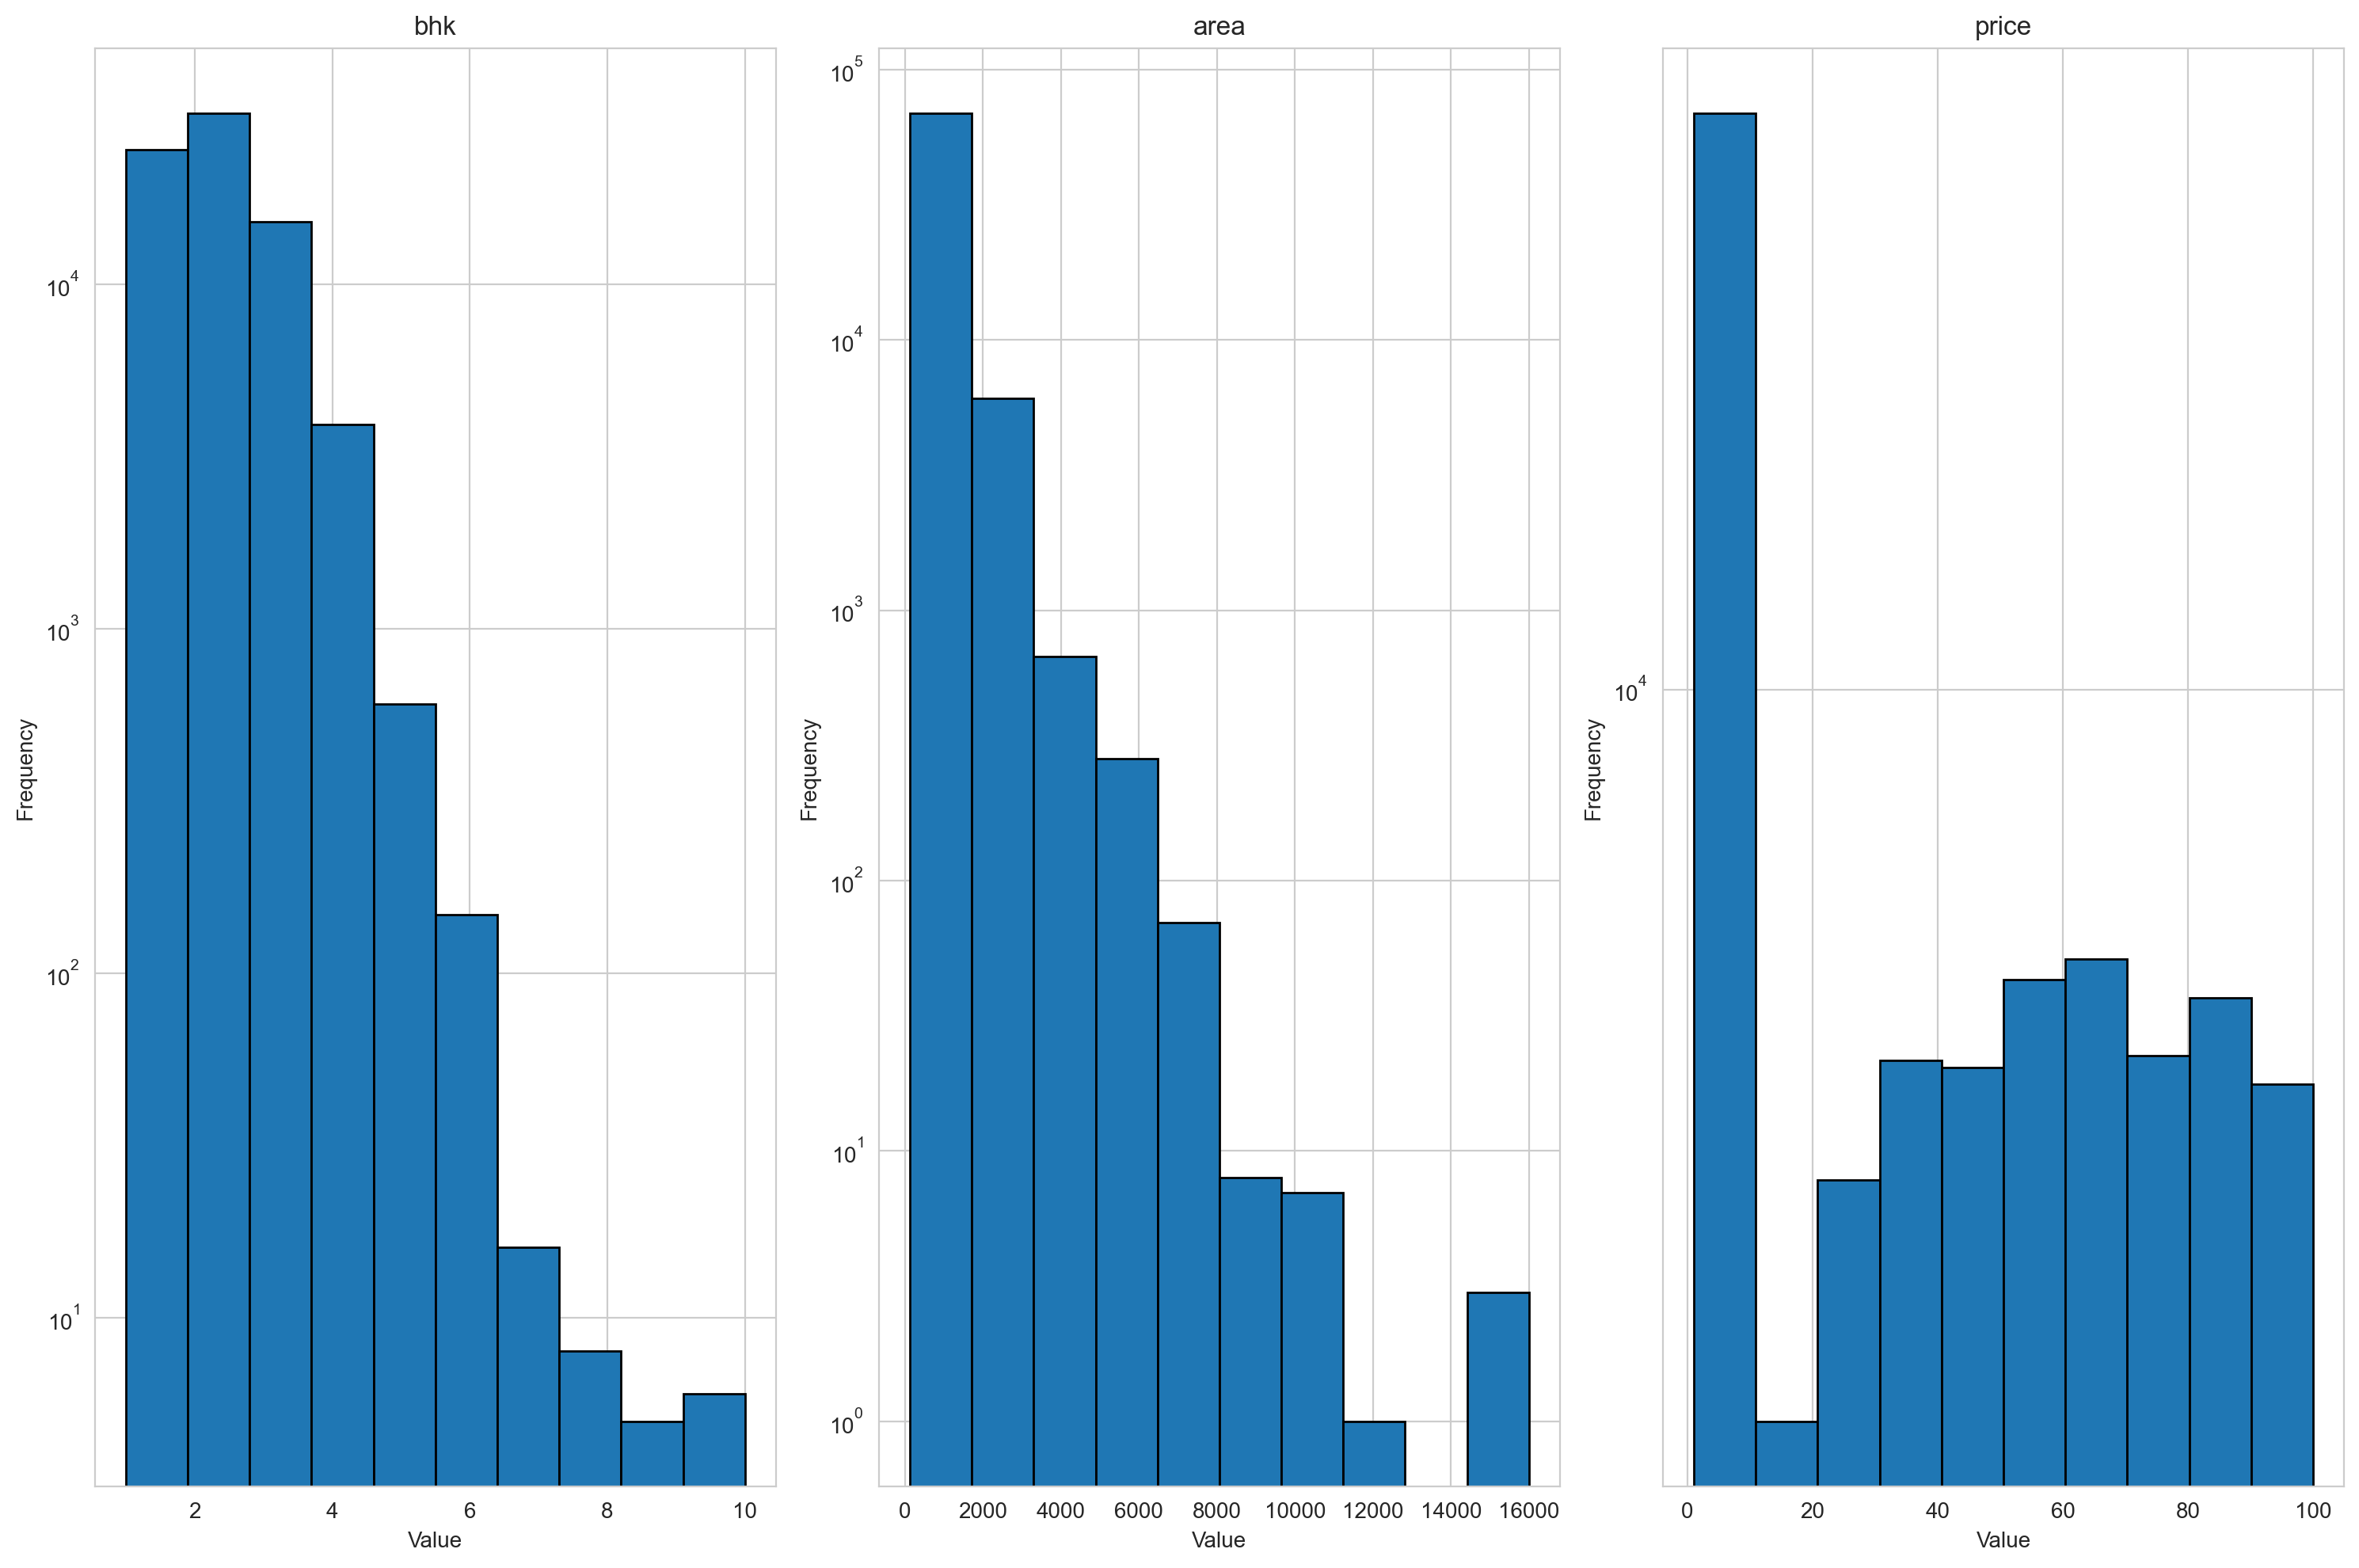

In [7]:
# plotting histogram
plot_histograms(df,yscale='log', bins=10)

# Univariate Analysis: Barplot

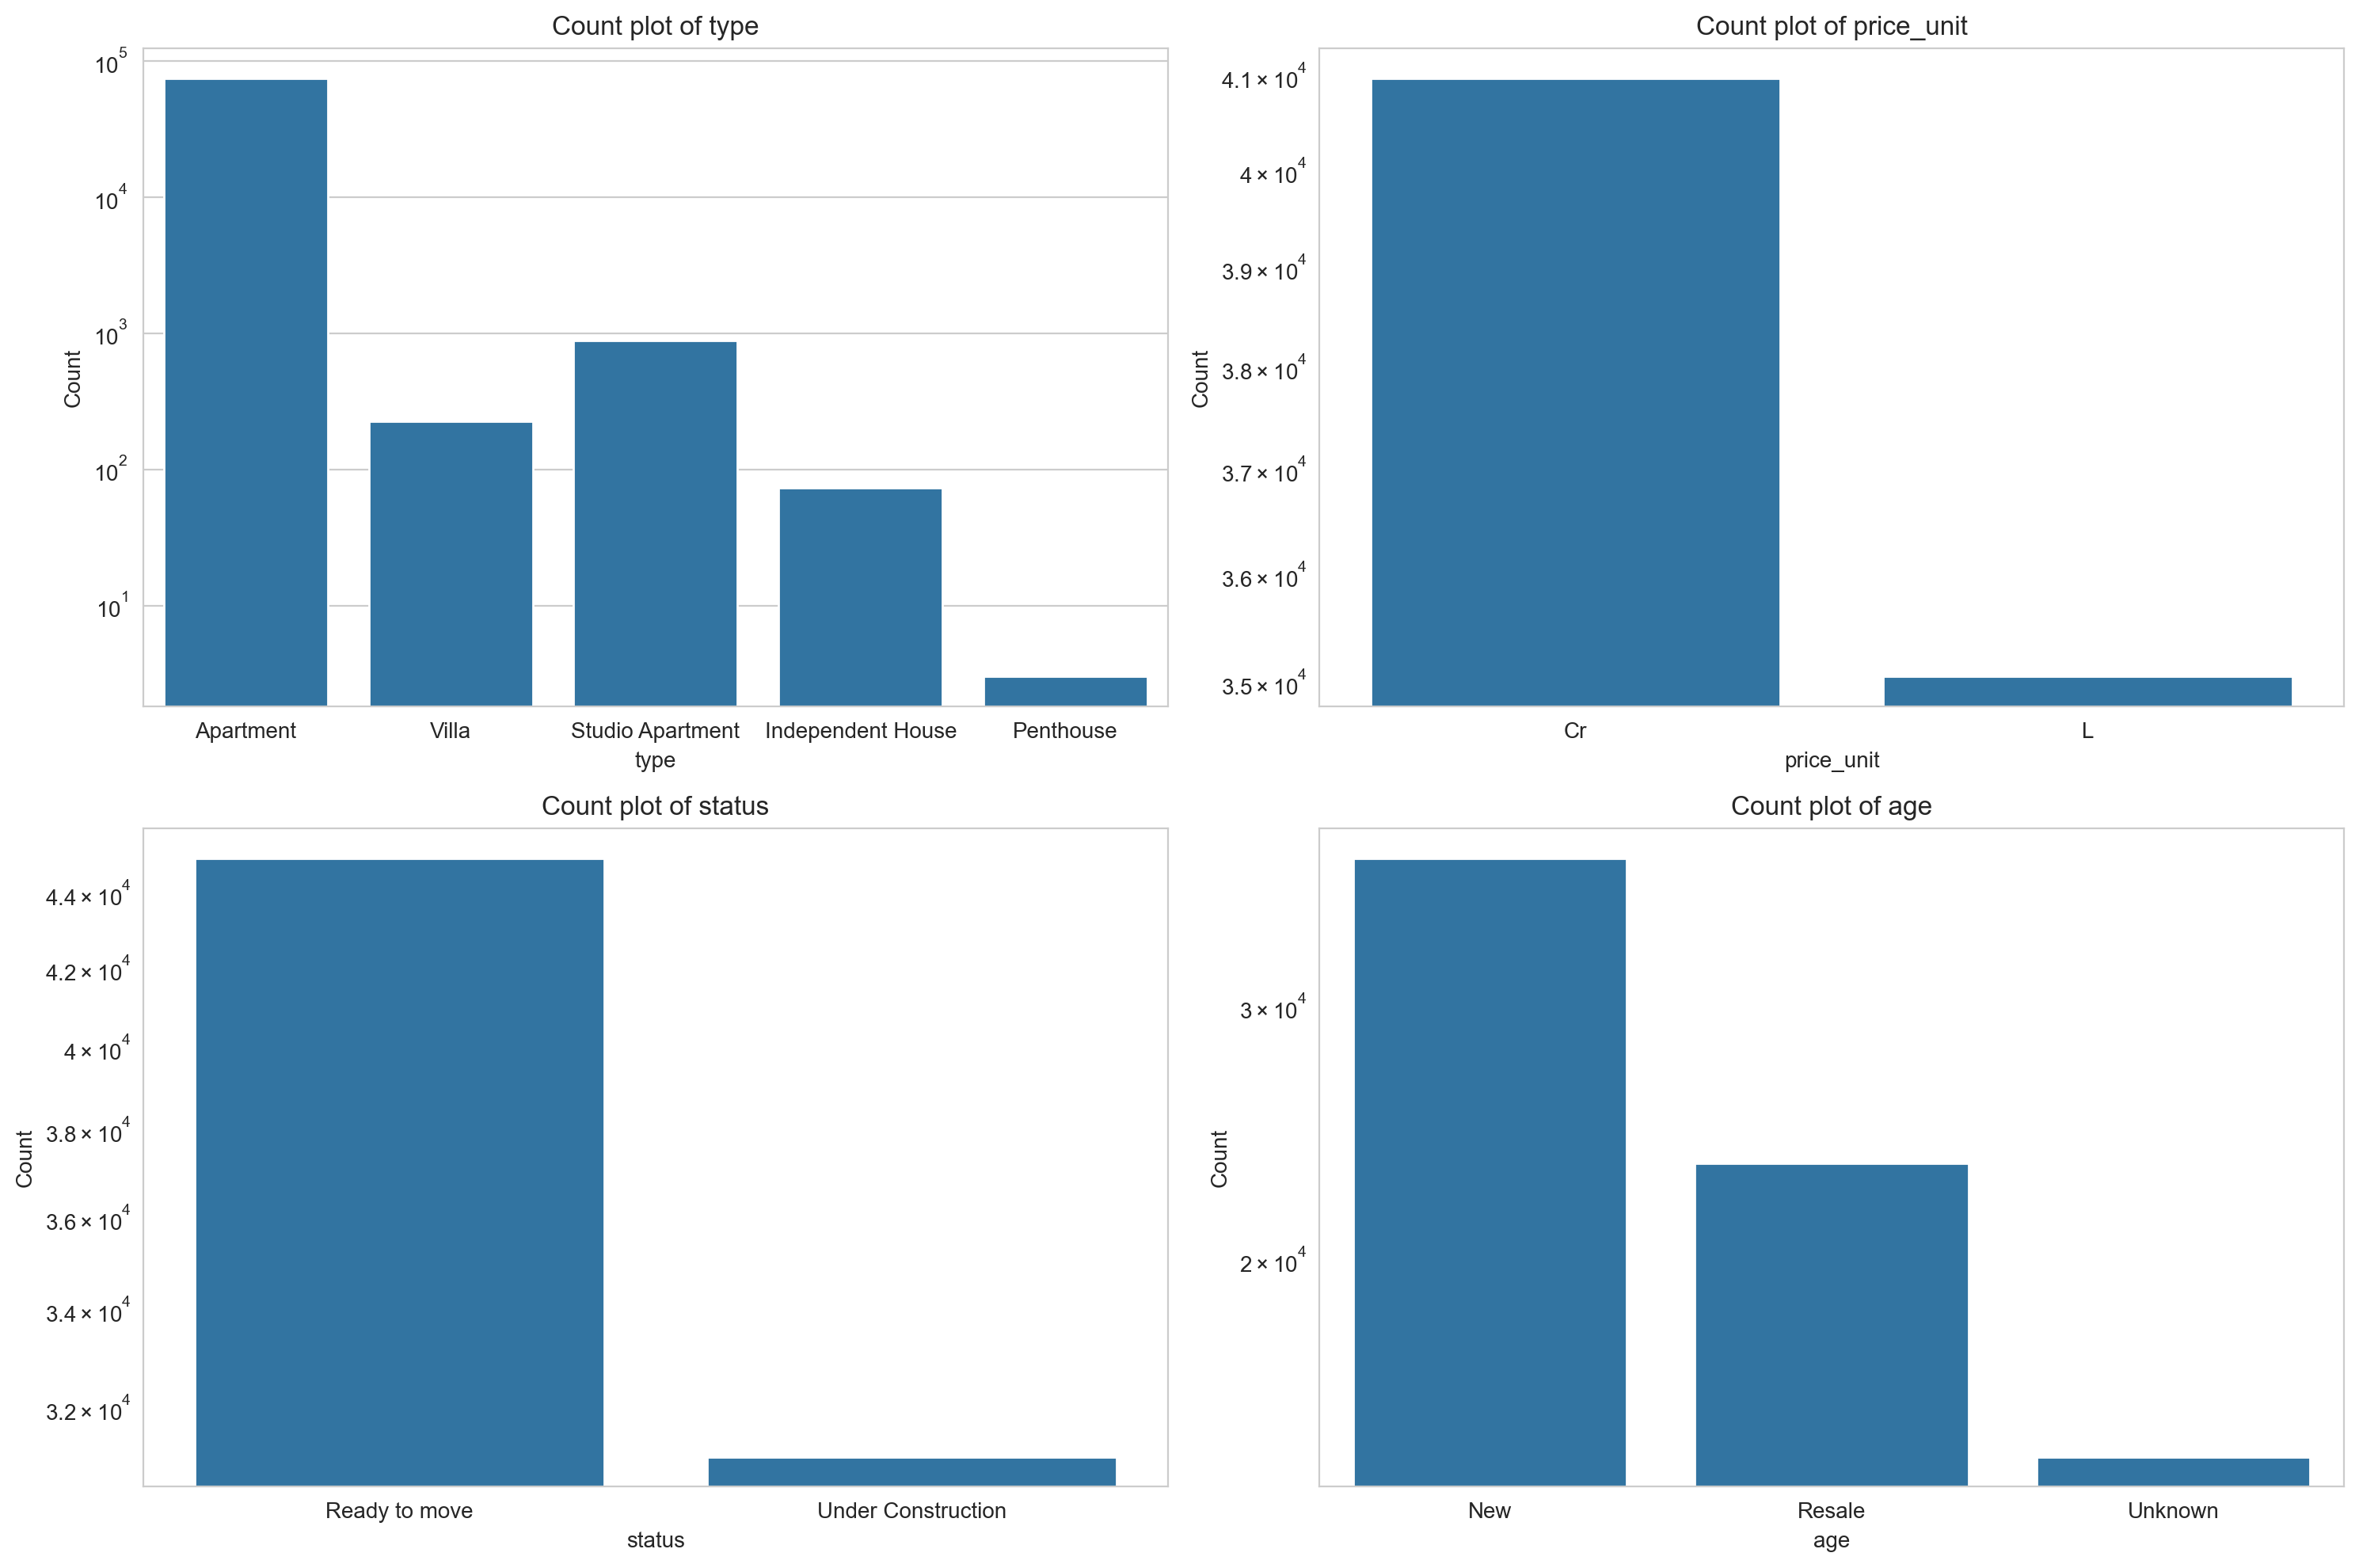

In [8]:
# plotting countplot
plot_categorical_countplots(df, max_cols=2, yscale='log')

- Most of the listings are apartments, lowest is penthouse
- Most of the properties have the Cr tag
- Most of the properties are new
- Most of the properties are under ready to move

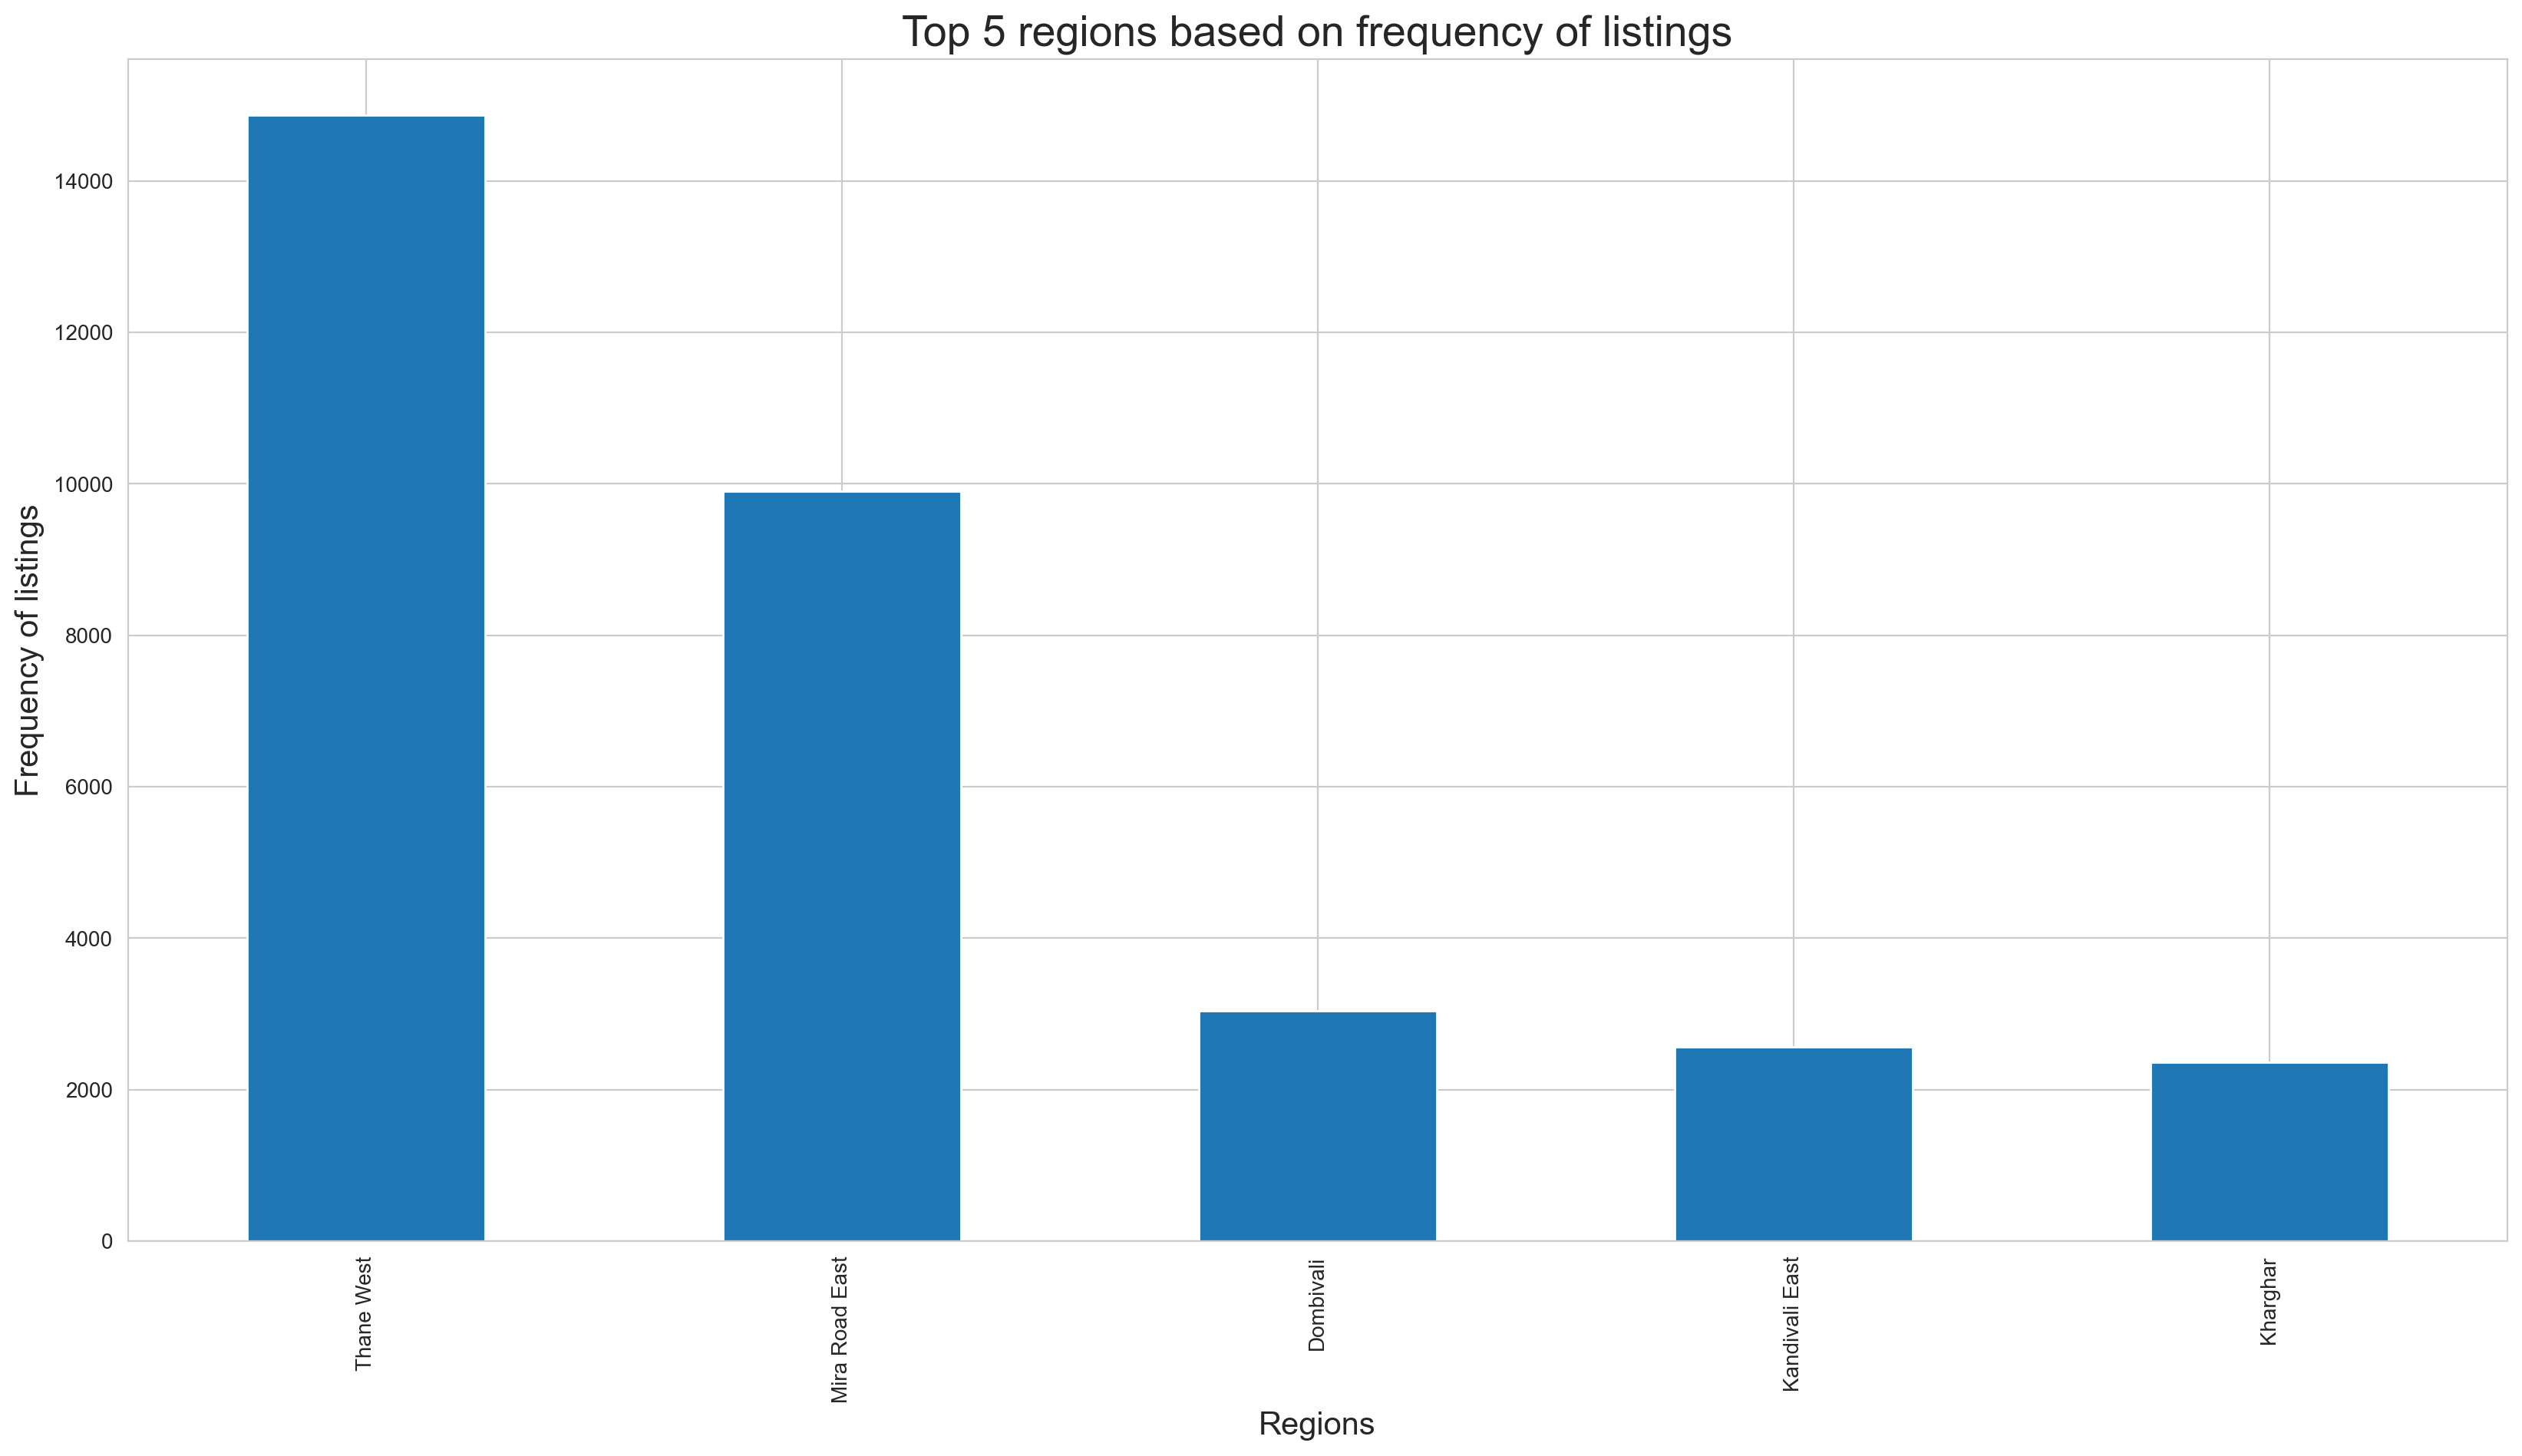

In [9]:
# top 5 most commmon regions
df['region'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 regions based on frequency of listings', fontsize=20)
plt.ylabel('Frequency of listings', fontsize=15)
plt.xlabel('Regions', fontsize=15)
plt.show()

- Thane West is the most common in the dataset
- Mira Road East is the second highest
- Followed by Dombivali, Kandivali East, Khargar

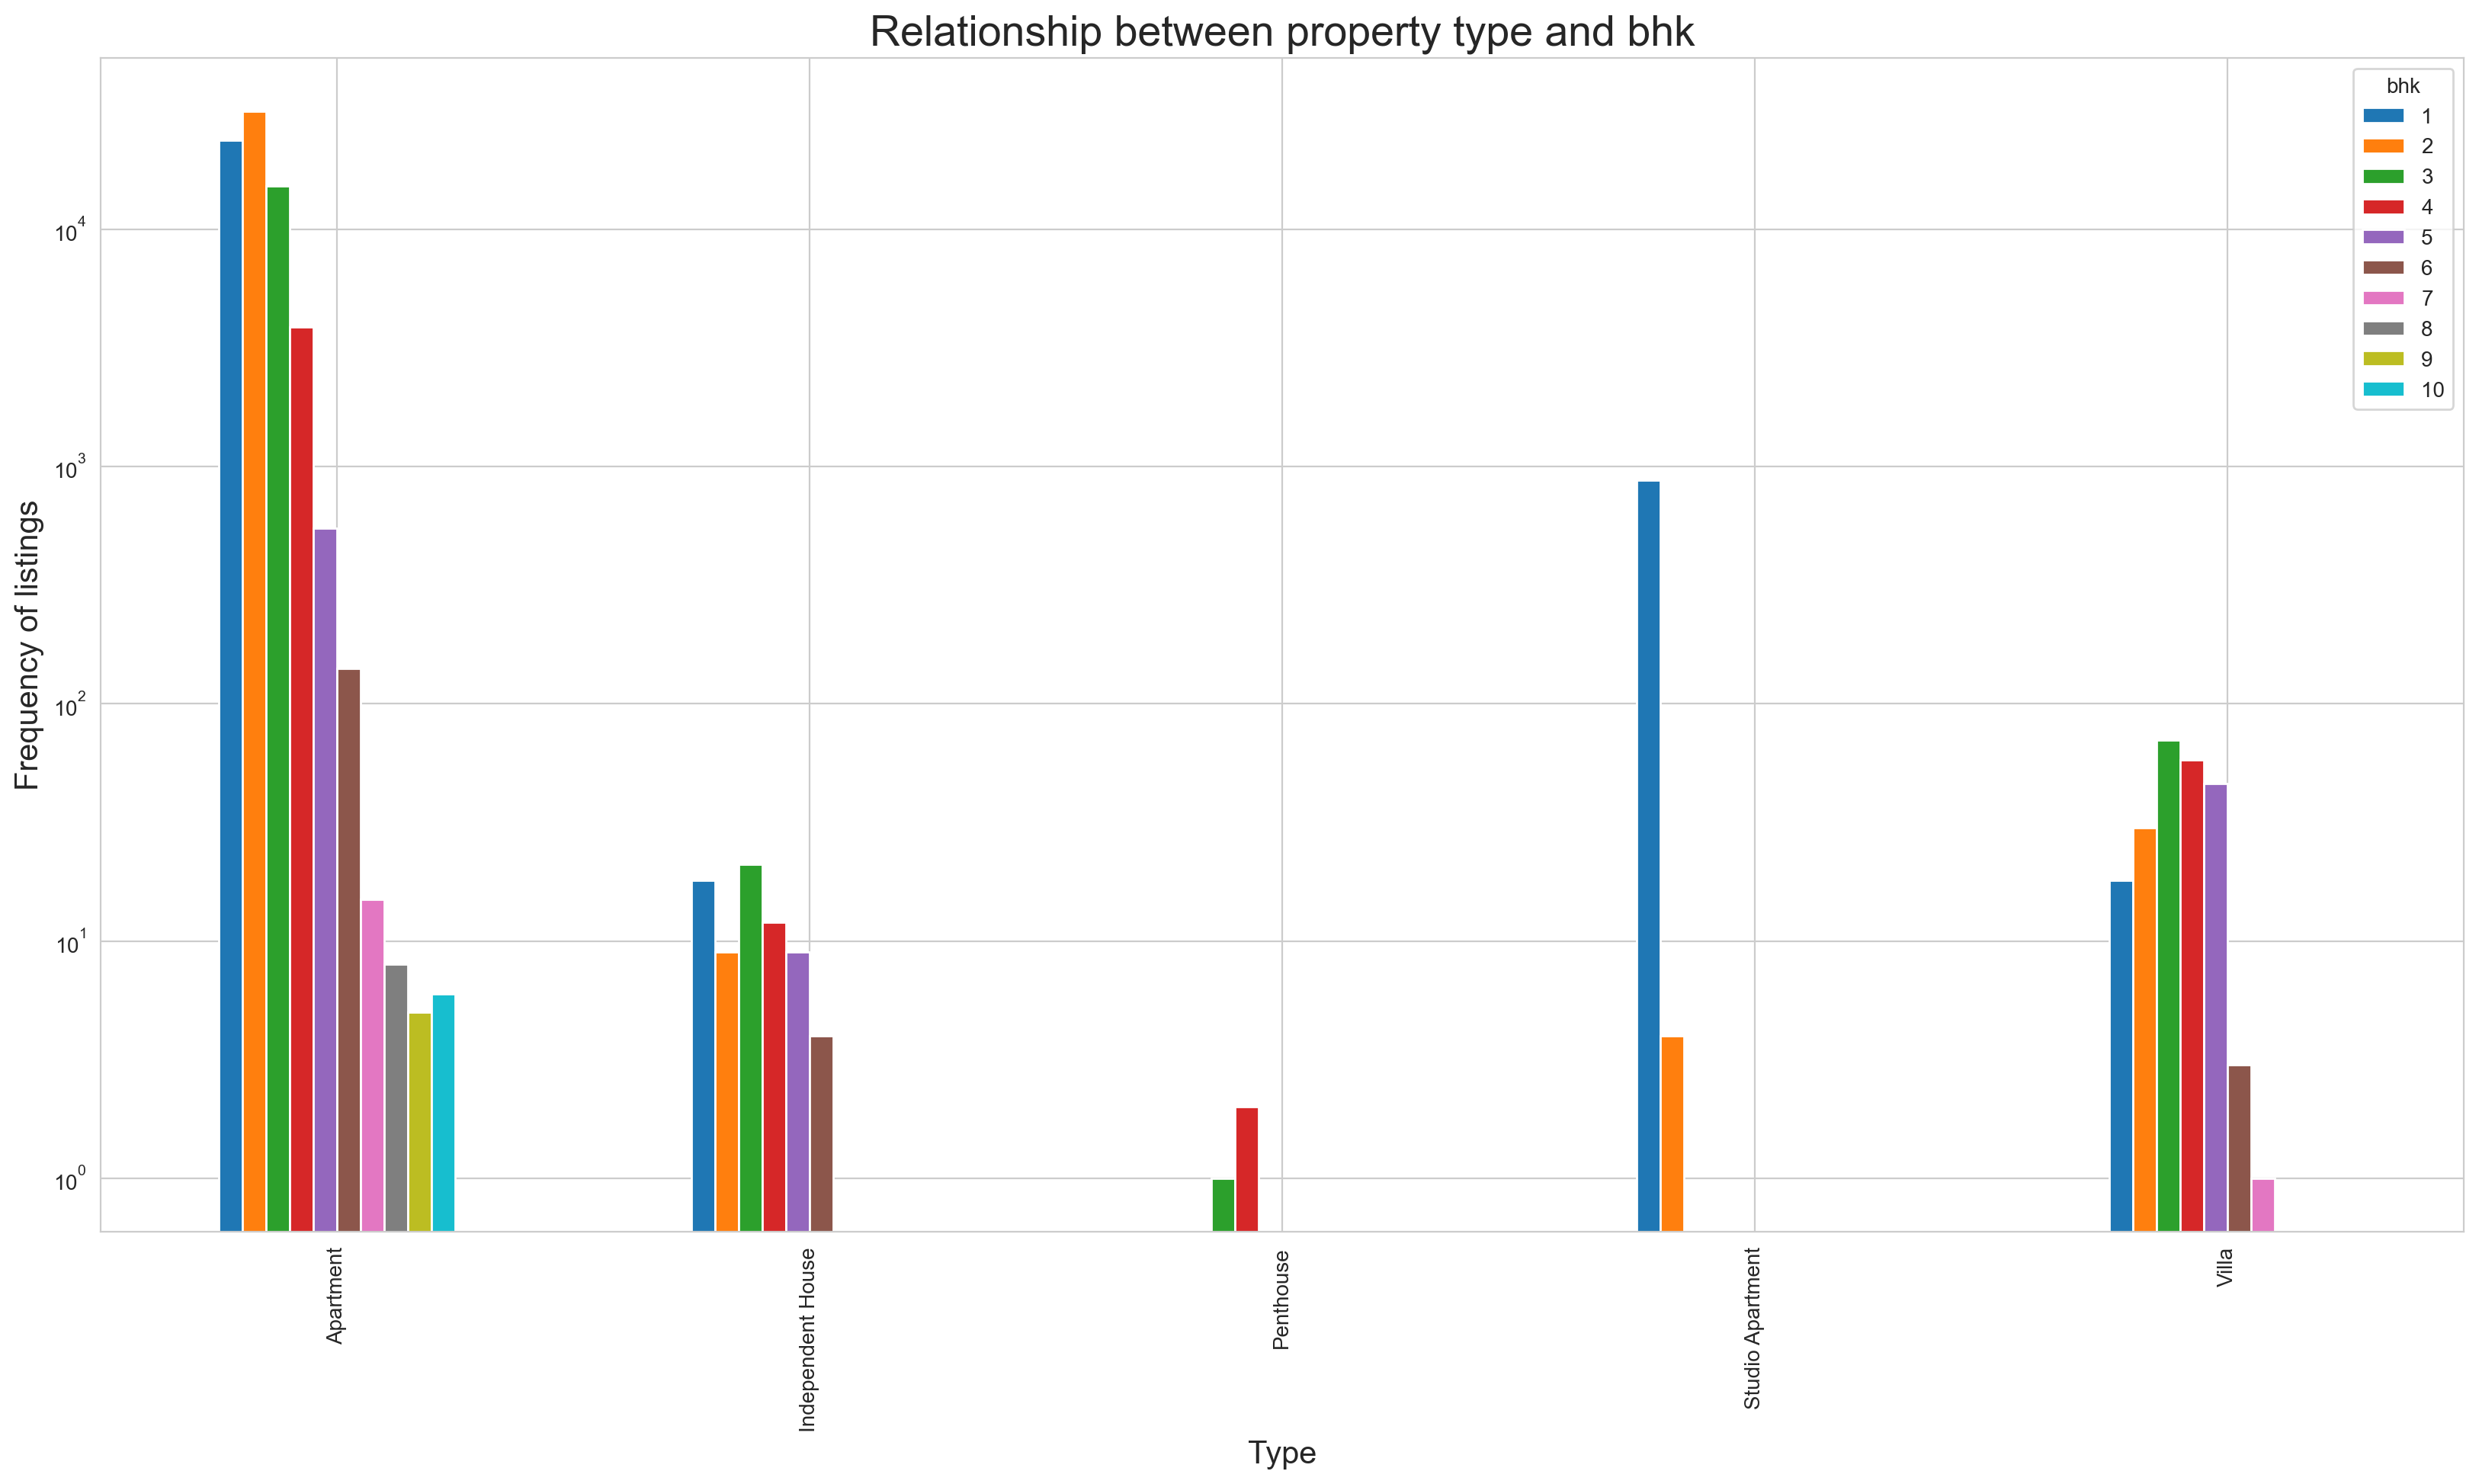

In [10]:
# Frequencies of BHK in types of properties
df.groupby('type')['bhk'].value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Relationship between property type and bhk', fontsize=20)
plt.ylabel('Frequency of listings', fontsize=15)
plt.xlabel('Type', fontsize=15)
plt.yscale('log')
plt.show()

- Apartment has BHK ranging from 1-10
- Independent houses have BHK from 1-6
- Penthouses have 3-4 BHK
- Villas have 1-7 BHK

# Bivariate analysis: Correlation heatmap plots

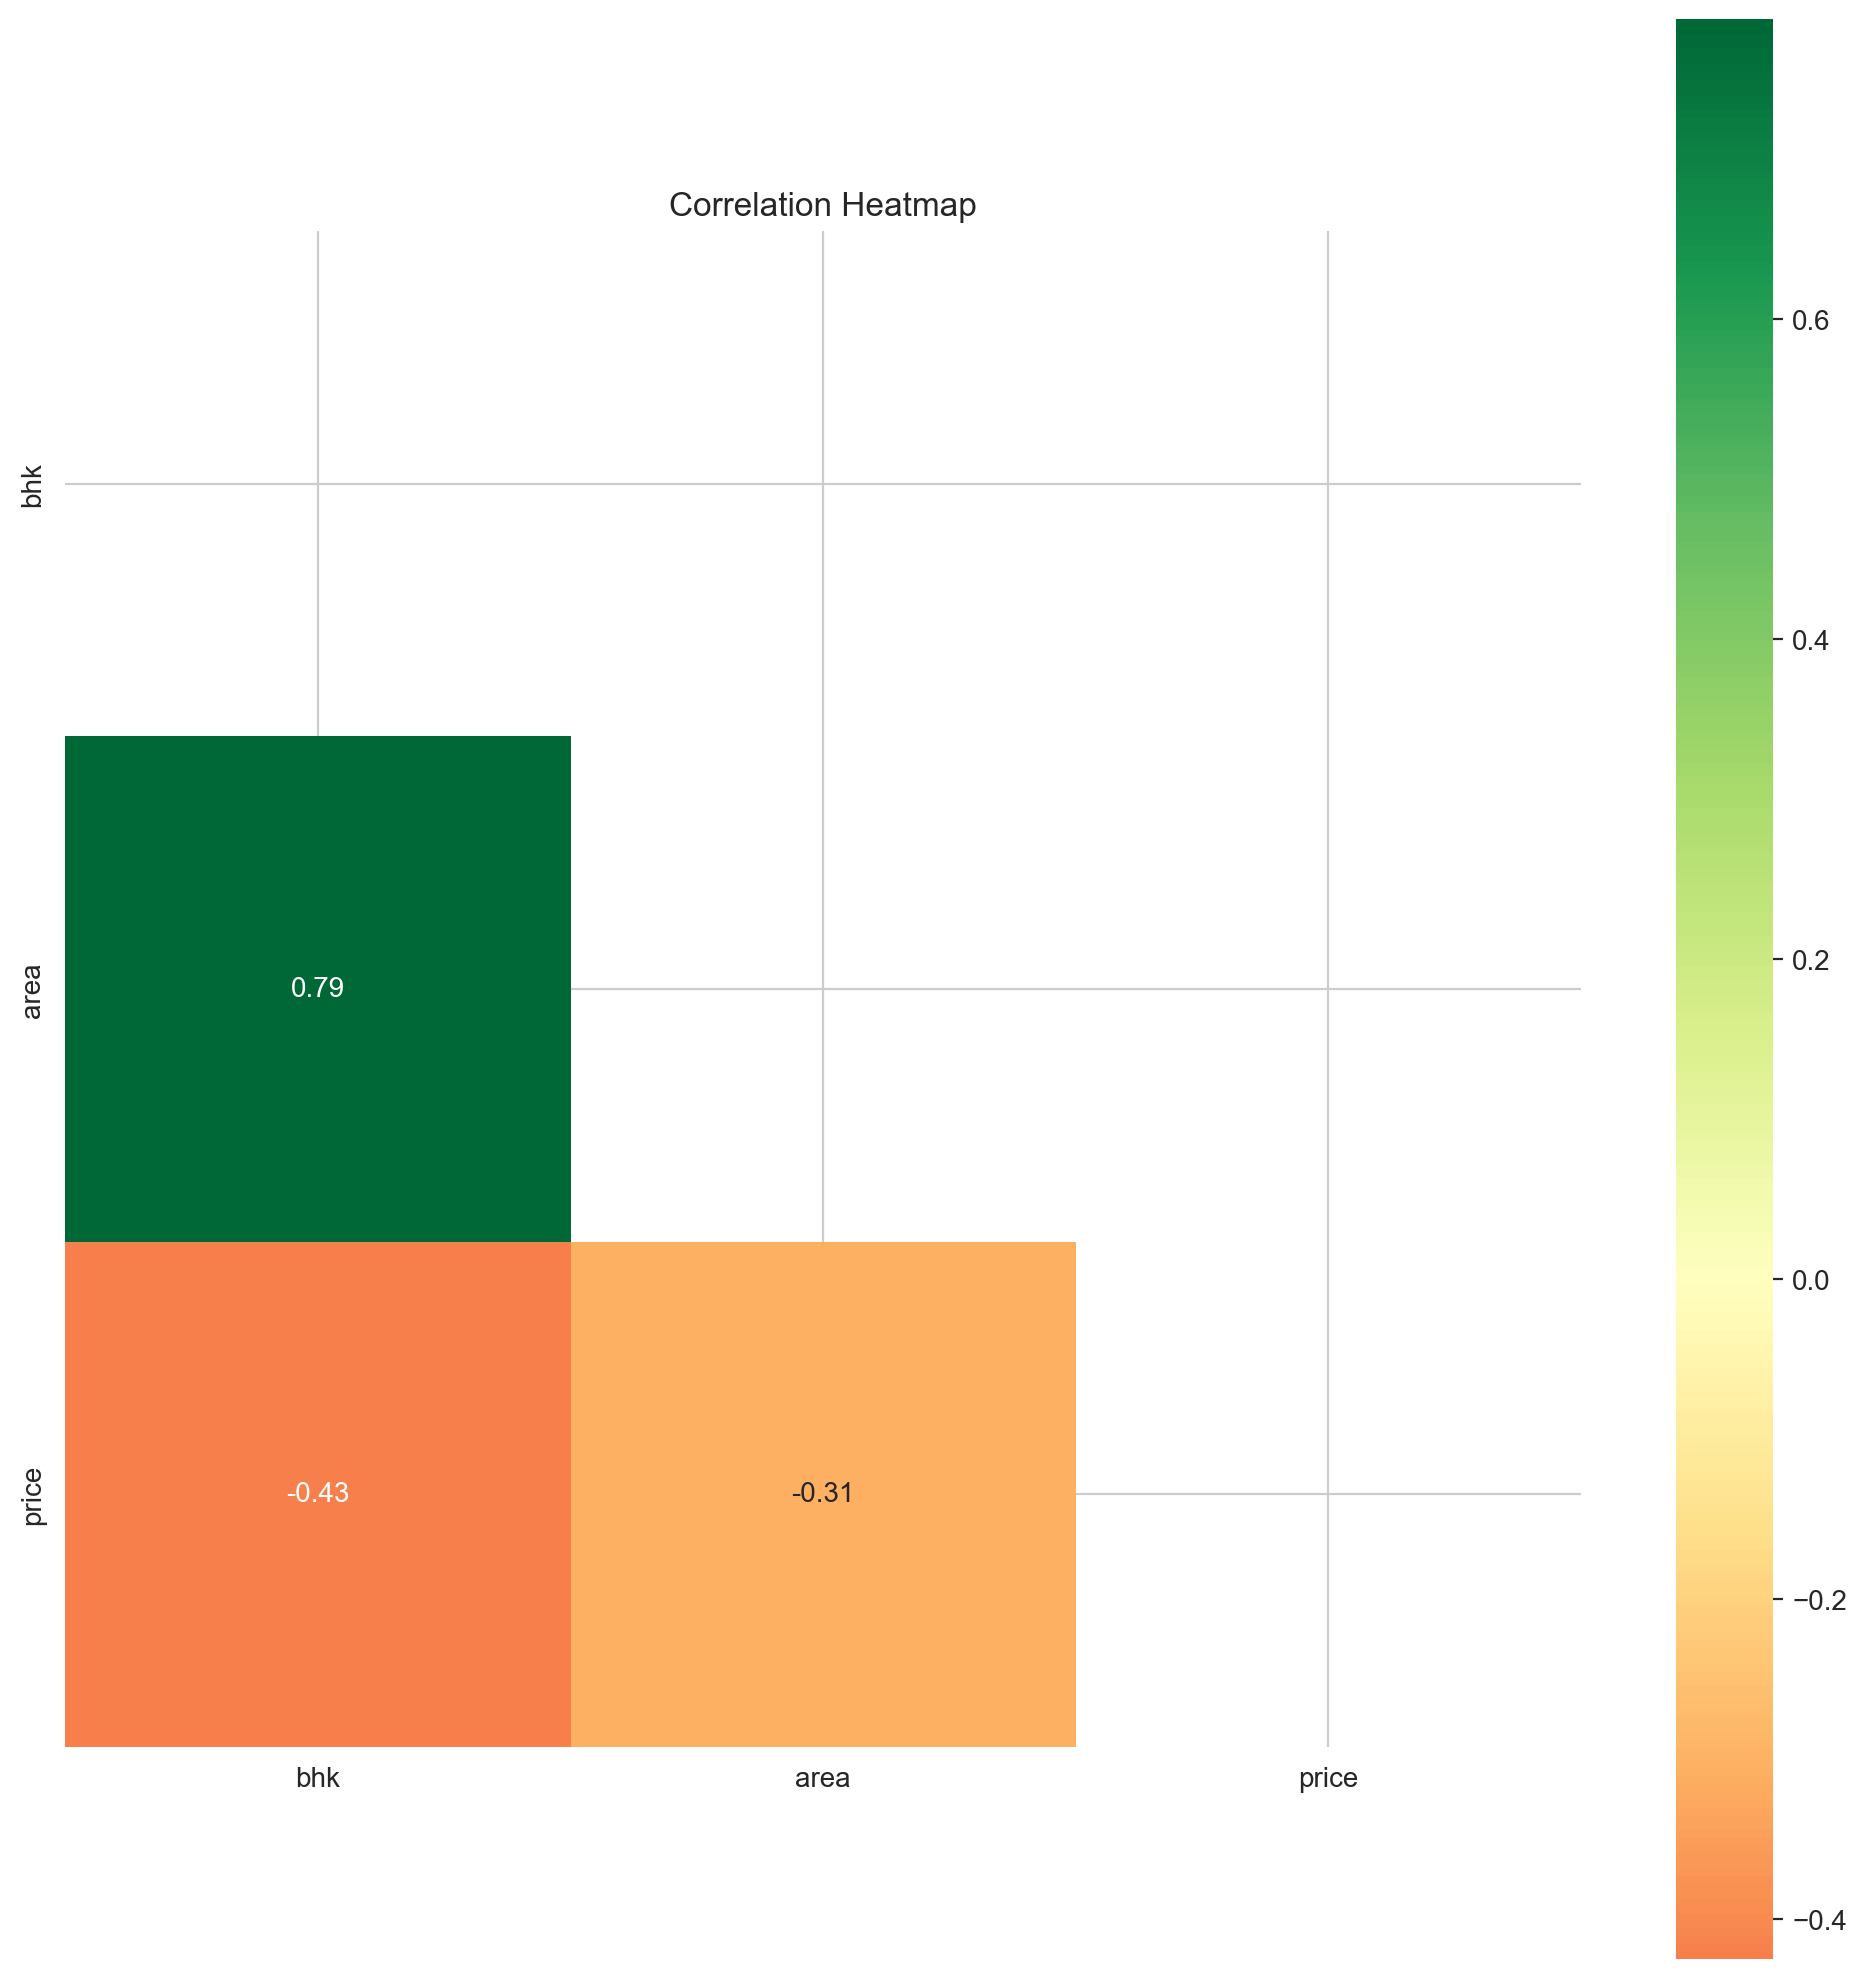

In [12]:
# creating a list with numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
plot_corr(df[columns].corr())

That doesn't look correct. but that could be because of the way price is written e.g. 50 Lakhs and 5 Cr. <br>we can tell that 5 cr is higher but the model code doesn't know that. it thinks as 50 > 5 and hence shows negative correlation